# Regression with Neural Networks

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

## Anatomy of an MLP:  elements of a neural network model

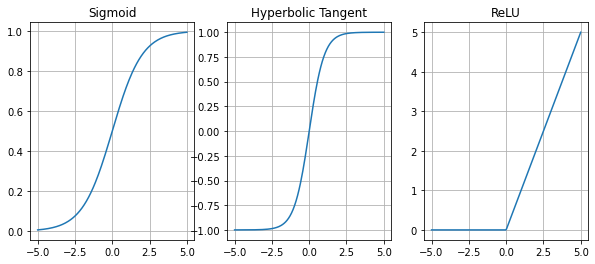

In [38]:
x = np.linspace(-5, 5, 200)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,4))
ax[0].plot(x, 1/(1+np.exp(-x)))
ax[0].set_title('Sigmoid')
     
ax[1].plot(x, np.tanh(x))
ax[1].set_title('Hyperbolic Tangent')

ax[2].plot(x, np.maximum(0, x))
ax[2].set_title('ReLU')

for p in ax:
    p.grid()

## Loading and preparation

In [39]:
DATA_DIR = '../data'
FILE_NAME = 'diamonds.csv'
data_path = os.path.join(DATA_DIR, FILE_NAME)
diamonds = pd.read_csv(data_path)
## Preparation done from Chapter 2
diamonds = diamonds.loc[(diamonds['x']>0) | (diamonds['y']>0)]
diamonds.loc[11182, 'x'] = diamonds['x'].median()
diamonds.loc[11182, 'z'] = diamonds['z'].median()
diamonds = diamonds.loc[~((diamonds['y'] > 30) | (diamonds['z'] > 30))]
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['cut'], prefix='cut', drop_first=True)], axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['color'], prefix='color', drop_first=True)], axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['clarity'], prefix='clarity', drop_first=True)], axis=1)

#### Train-test split

In [40]:
X = diamonds.drop(['cut','color','clarity','price'], axis=1)
y = diamonds['price']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

#### Dimensionality reduction

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
pca.fit(X_train[['x','y','z']])
X_train['dim_index'] = pca.transform(X_train[['x','y','z']]).flatten()
X_train.drop(['x','y','z'], axis=1, inplace=True)

C:\Users\Kaito\AppData\Local\Temp\ipykernel_18792\1275030885.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['dim_index'] = pca.transform(X_train[['x','y','z']]).flatten()
C:\Users\Kaito\AppData\Local\Temp\ipykernel_18792\1275030885.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(['x','y','z'], axis=1, inplace=True)


#### Standarize

In [43]:
numerical_features = ['carat', 'depth', 'table', 'dim_index']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train.loc[:, numerical_features] = scaler.transform(X_train[numerical_features])

C:\Users\Kaito\AppData\Local\Temp\ipykernel_18792\2339634155.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[:, numerical_features] = scaler.transform(X_train[numerical_features])


### Building the MLP for predicting diamond prices

In [45]:
from tensorflow.keras.models import Sequential
nn_reg = Sequential()

In [46]:
from tensorflow.keras.layers import Dense

In [48]:
n_input = X_train.shape[1]
n_hidden1 = 32
# first hidden layer
nn_reg.add(Dense(units=n_hidden1, activation='relu', input_shape=(n_input,)))

In [49]:
n_hidden2 = 16
n_hidden3 = 8
# add second hidden layer
nn_reg.add(Dense(units=n_hidden2, activation='relu'))
# add third hidden layer
nn_reg.add(Dense(units=n_hidden3, activation='relu'))

In [50]:
# output layer
nn_reg.add(Dense(units=1, activation=None))

In [51]:
nn_reg.predict(X_train.iloc[:5,:])

array([[ 0.13838723],
       [-0.01856311],
       [ 0.09687743],
       [ 0.05564625],
       [-0.13368006]], dtype=float32)

## Training the neural network

In [52]:
## compiling step
nn_reg.compile(loss='mean_squared_error', optimizer='adam')

In [53]:
nn_reg.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                704       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 2,433
Trainable params: 2,433
Non-trainable params: 0
_________________________________________________________________


In [54]:
batch_size = 64
n_epochs = 50
nn_reg.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size)

Epoch 1/50
759/759 [==============================] - 2s 2ms/step - loss: 20138640.3000
Epoch 2/50
759/759 [==============================] - 1s 1ms/step - loss: 1177435.2735
Epoch 3/50
759/759 [==============================] - 1s 2ms/step - loss: 890959.4201
Epoch 4/50
759/759 [==============================] - 1s 2ms/step - loss: 711147.9567
Epoch 5/50
759/759 [==============================] - 1s 2ms/step - loss: 646303.4166
Epoch 6/50
759/759 [==============================] - 1s 2ms/step - loss: 571772.0749
Epoch 7/50
759/759 [==============================] - 2s 2ms/step - loss: 524975.2692
Epoch 8/50
759/759 [==============================] - 2s 2ms/step - loss: 489518.5923
Epoch 9/50
759/759 [==============================] - 1s 2ms/step - loss: 454421.4896
Epoch 10/50
759/759 [==============================] - 1s 2ms/step - loss: 438860.7836
Epoch 11/50
759/759 [==============================] - 2s 2ms/step - loss: 425955.9200
Epoch 12/50
759/759 [============================

### Transform and scale the testing dataset

In [55]:
## PCA for dimentionality reduction:
X_test['dim_index'] = pca.transform(X_test[['x','y','z']]).flatten()
X_test.drop(['x','y','z'], axis=1, inplace=True)
## Scale our numerical features so they have zero mean and a variance of one
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

C:\Users\Kaito\AppData\Local\Temp\ipykernel_18792\386648586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['dim_index'] = pca.transform(X_test[['x','y','z']]).flatten()
C:\Users\Kaito\AppData\Local\Temp\ipykernel_18792\386648586.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(['x','y','z'], axis=1, inplace=True)
C:\Users\Kaito\AppData\Local\Temp\ipykernel_18792\386648586.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [56]:
from sklearn.metrics import mean_squared_error
y_pred_train = nn_reg.predict(X_train)
y_pred_test = nn_reg.predict(X_test)
train_mse = mean_squared_error(y_true=y_train, y_pred=y_pred_train)
test_mse = mean_squared_error(y_true=y_test, y_pred=y_pred_test)
print("Train MSE: {:0.3f} \nTest MSE: {:0.3f}".format(train_mse/1e6, test_mse/1e6))

Train MSE: 0.313 
Test MSE: 0.326


### Regularization

In [57]:
nn_reg2 = Sequential()
n_hidden = 64
# hidden layers
nn_reg2.add(Dense(units=n_hidden, activation='relu', input_shape=(n_input,)))
nn_reg2.add(Dense(units=n_hidden, activation='relu'))
nn_reg2.add(Dense(units=n_hidden, activation='relu'))
nn_reg2.add(Dense(units=n_hidden, activation='relu'))
nn_reg2.add(Dense(units=n_hidden, activation='relu'))
nn_reg2.add(Dense(units=n_hidden, activation='relu'))
# output layer
nn_reg2.add(Dense(units=1, activation=None))

In [58]:
nn_reg2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae'])

In [59]:
nn_reg2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                1408      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [60]:
batch_size = 64
n_epochs = 300
history = nn_reg2.fit(X_train, y_train,
                      epochs=n_epochs,
                      batch_size=batch_size,
                      validation_split=0.1)

Epoch 1/300
683/683 [==============================] - 3s 3ms/step - loss: 10948597.6371 - mse: 10948597.6371 - mae: 1813.6424 - val_loss: 962274.1250 - val_mse: 962274.1250 - val_mae: 509.7831
Epoch 2/300
683/683 [==============================] - 2s 3ms/step - loss: 741153.5630 - mse: 741153.5630 - mae: 444.2895 - val_loss: 625954.4375 - val_mse: 625954.4375 - val_mae: 400.6062
Epoch 3/300
683/683 [==============================] - 2s 3ms/step - loss: 538401.6122 - mse: 538401.6122 - mae: 386.5743 - val_loss: 548081.8125 - val_mse: 548081.8125 - val_mae: 390.1127
Epoch 4/300
683/683 [==============================] - 2s 3ms/step - loss: 462546.7381 - mse: 462546.7381 - mae: 368.4099 - val_loss: 467269.3438 - val_mse: 467269.3438 - val_mae: 372.9443
Epoch 5/300
683/683 [==============================] - 2s 3ms/step - loss: 408271.6508 - mse: 408271.6508 - mae: 352.6646 - val_loss: 454741.0312 - val_mse: 454741.0312 - val_mae: 390.7357
Epoch 6/300
683/683 [=============================

683/683 [==============================] - 2s 3ms/step - loss: 284219.0986 - mse: 284219.0986 - mae: 293.4085 - val_loss: 321237.2500 - val_mse: 321237.2500 - val_mae: 307.0283
Epoch 45/300
683/683 [==============================] - 2s 3ms/step - loss: 286440.2711 - mse: 286440.2711 - mae: 295.0623 - val_loss: 326871.4688 - val_mse: 326871.4688 - val_mae: 296.4868
Epoch 46/300
683/683 [==============================] - 2s 3ms/step - loss: 287475.5990 - mse: 287475.5990 - mae: 296.7168 - val_loss: 355806.3125 - val_mse: 355806.3125 - val_mae: 322.3969
Epoch 47/300
683/683 [==============================] - 2s 3ms/step - loss: 295789.4915 - mse: 295789.4915 - mae: 295.9941 - val_loss: 338841.0000 - val_mse: 338841.0000 - val_mae: 325.1914
Epoch 48/300
683/683 [==============================] - 2s 3ms/step - loss: 285980.4581 - mse: 285980.4581 - mae: 293.9253 - val_loss: 313742.7188 - val_mse: 313742.7188 - val_mae: 298.7589
Epoch 49/300
683/683 [==============================] - 2s 3ms/

683/683 [==============================] - 2s 3ms/step - loss: 275014.3115 - mse: 275014.3115 - mae: 284.1815 - val_loss: 320617.7188 - val_mse: 320617.7188 - val_mae: 293.5753
Epoch 88/300
683/683 [==============================] - 2s 3ms/step - loss: 278276.4752 - mse: 278276.4752 - mae: 288.4016 - val_loss: 345470.0000 - val_mse: 345470.0000 - val_mae: 333.5504
Epoch 89/300
683/683 [==============================] - 2s 3ms/step - loss: 272027.3728 - mse: 272027.3728 - mae: 287.7043 - val_loss: 340617.6562 - val_mse: 340617.6562 - val_mae: 327.0978
Epoch 90/300
683/683 [==============================] - 2s 3ms/step - loss: 281296.7368 - mse: 281296.7368 - mae: 289.8047 - val_loss: 322548.8125 - val_mse: 322548.8125 - val_mae: 295.5013
Epoch 91/300
683/683 [==============================] - 2s 3ms/step - loss: 270834.2445 - mse: 270834.2445 - mae: 285.3641 - val_loss: 404310.7500 - val_mse: 404310.7500 - val_mae: 320.6823
Epoch 92/300
683/683 [==============================] - 2s 3ms/

Epoch 130/300
683/683 [==============================] - 2s 4ms/step - loss: 254017.2454 - mse: 254017.2454 - mae: 276.3402 - val_loss: 352145.2188 - val_mse: 352145.2188 - val_mae: 305.5449
Epoch 131/300
683/683 [==============================] - 3s 4ms/step - loss: 255860.1274 - mse: 255860.1274 - mae: 277.1921 - val_loss: 307900.9375 - val_mse: 307900.9375 - val_mae: 294.0042
Epoch 132/300
683/683 [==============================] - 2s 4ms/step - loss: 250219.0695 - mse: 250219.0695 - mae: 271.4880 - val_loss: 309302.3750 - val_mse: 309302.3750 - val_mae: 298.3054
Epoch 133/300
683/683 [==============================] - 2s 3ms/step - loss: 252880.5679 - mse: 252880.5679 - mae: 276.4890 - val_loss: 313531.2188 - val_mse: 313531.2188 - val_mae: 295.4058
Epoch 134/300
683/683 [==============================] - 2s 3ms/step - loss: 264861.4451 - mse: 264861.4451 - mae: 280.6303 - val_loss: 329701.5625 - val_mse: 329701.5625 - val_mae: 296.6551
Epoch 135/300
683/683 [======================

Epoch 173/300
683/683 [==============================] - 2s 3ms/step - loss: 256739.6133 - mse: 256739.6133 - mae: 275.2732 - val_loss: 311231.8750 - val_mse: 311231.8750 - val_mae: 295.2270
Epoch 174/300
683/683 [==============================] - 2s 4ms/step - loss: 238497.6043 - mse: 238497.6043 - mae: 265.5734 - val_loss: 317025.2500 - val_mse: 317025.2500 - val_mae: 298.9705
Epoch 175/300
683/683 [==============================] - 2s 3ms/step - loss: 247192.7453 - mse: 247192.7453 - mae: 271.9811 - val_loss: 320997.9062 - val_mse: 320997.9062 - val_mae: 307.0769
Epoch 176/300
683/683 [==============================] - 2s 3ms/step - loss: 243385.9411 - mse: 243385.9411 - mae: 272.0150 - val_loss: 316479.4062 - val_mse: 316479.4062 - val_mae: 291.8618
Epoch 177/300
683/683 [==============================] - 2s 3ms/step - loss: 245653.3200 - mse: 245653.3200 - mae: 270.5044 - val_loss: 326840.3438 - val_mse: 326840.3438 - val_mae: 311.1054
Epoch 178/300
683/683 [======================

Epoch 216/300
683/683 [==============================] - 2s 3ms/step - loss: 238662.9530 - mse: 238662.9530 - mae: 267.1513 - val_loss: 314253.4062 - val_mse: 314253.4062 - val_mae: 294.3423
Epoch 217/300
683/683 [==============================] - 2s 3ms/step - loss: 228884.8906 - mse: 228884.8906 - mae: 264.6933 - val_loss: 323009.3438 - val_mse: 323009.3438 - val_mae: 292.1854
Epoch 218/300
683/683 [==============================] - 2s 3ms/step - loss: 236174.2480 - mse: 236174.2480 - mae: 268.7834 - val_loss: 323088.9688 - val_mse: 323088.9688 - val_mae: 295.2176
Epoch 219/300
683/683 [==============================] - 2s 3ms/step - loss: 244907.0462 - mse: 244907.0462 - mae: 270.7650 - val_loss: 321094.9062 - val_mse: 321094.9062 - val_mae: 290.7967
Epoch 220/300
683/683 [==============================] - 2s 3ms/step - loss: 246306.9705 - mse: 246306.9705 - mae: 269.8759 - val_loss: 335228.8438 - val_mse: 335228.8438 - val_mae: 307.5865
Epoch 221/300
683/683 [======================

Epoch 259/300
683/683 [==============================] - 2s 3ms/step - loss: 219981.2948 - mse: 219981.2948 - mae: 258.6278 - val_loss: 310957.5312 - val_mse: 310957.5312 - val_mae: 292.5421
Epoch 260/300
683/683 [==============================] - 2s 3ms/step - loss: 217186.0441 - mse: 217186.0441 - mae: 259.2535 - val_loss: 335067.4375 - val_mse: 335067.4375 - val_mae: 299.0980
Epoch 261/300
683/683 [==============================] - 2s 3ms/step - loss: 223720.5413 - mse: 223720.5413 - mae: 261.9029 - val_loss: 323414.5625 - val_mse: 323414.5625 - val_mae: 300.1036
Epoch 262/300
683/683 [==============================] - 2s 3ms/step - loss: 220900.7634 - mse: 220900.7634 - mae: 257.7059 - val_loss: 328993.3125 - val_mse: 328993.3125 - val_mae: 295.8835
Epoch 263/300
683/683 [==============================] - 2s 3ms/step - loss: 221663.5825 - mse: 221663.5825 - mae: 260.8850 - val_loss: 335563.3438 - val_mse: 335563.3438 - val_mae: 306.6711
Epoch 264/300
683/683 [======================

In [61]:
print(history.history.keys())

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


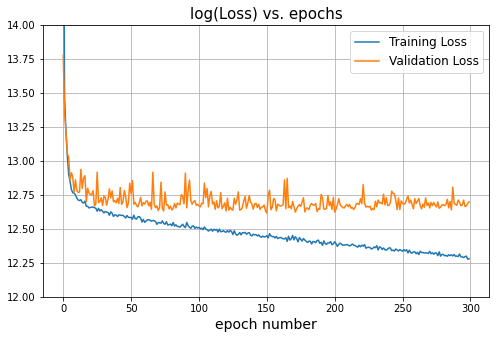

In [62]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(np.log(history.history['loss']), label='Training Loss')
ax.plot(np.log(history.history['val_loss']), label='Validation Loss')
ax.set_title("log(Loss) vs. epochs", fontsize=15)
ax.set_xlabel("epoch number", fontsize=14)
ax.legend(fontsize=12)
ax.set_ylim(12,14)
ax.grid();

## Early stopping

In [64]:
from tensorflow.keras.callbacks import EarlyStopping
early_stoping = EarlyStopping(monitor='val_mean_absolute_error',
                              min_delta=5,
                              patience=20,
                              verbose=1,
                              mode='auto')

In [65]:
nn_reg2 = Sequential()
n_hidden = 64
# hidden layers
nn_reg2.add(Dense(units=n_hidden, activation='relu', input_shape=(n_input,)))
nn_reg2.add(Dense(units=n_hidden, activation='relu'))
nn_reg2.add(Dense(units=n_hidden, activation='relu'))
nn_reg2.add(Dense(units=n_hidden, activation='relu'))
nn_reg2.add(Dense(units=n_hidden, activation='relu'))
nn_reg2.add(Dense(units=n_hidden, activation='relu'))
# output layer
nn_reg2.add(Dense(units=1, activation=None))
# compilation
nn_reg2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae'])

In [28]:
batch_size = 64
n_epochs = 300
history = nn_reg2.fit(X_train, y_train,
                      epochs=n_epochs,
                      batch_size=batch_size,
                      validation_split=0.1,
                      callbacks=[early_stoping])

Train on 43683 samples, validate on 4854 samples
Epoch 1/300
43683/43683 [==============================] - 1s 28us/step - loss: 4003936.0924 - mse: 4003936.0000 - mae: 975.8764 - val_loss: 1007149.5623 - val_mse: 1007149.4375 - val_mae: 535.9521
Epoch 2/300
 6016/43683 [===>..........................] - ETA: 0s - loss: 802061.5098 - mse: 802061.5625 - mae: 482.7067

C:\Anaconda\envs\ho-pawp\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_mean_absolute_error` which is not available. Available metrics are: val_loss,val_mse,val_mae,loss,mse,mae
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


43683/43683 [==============================] - 1s 25us/step - loss: 737259.9787 - mse: 737260.0000 - mae: 449.3518 - val_loss: 654988.1771 - val_mse: 654988.1250 - val_mae: 411.0558
Epoch 3/300
43683/43683 [==============================] - 1s 24us/step - loss: 568669.9191 - mse: 568669.5625 - mae: 393.7597 - val_loss: 634119.4010 - val_mse: 634119.3750 - val_mae: 444.4188
Epoch 4/300
43683/43683 [==============================] - 1s 25us/step - loss: 494174.2445 - mse: 494174.1875 - mae: 374.5719 - val_loss: 530084.9866 - val_mse: 530085.1875 - val_mae: 416.8546
Epoch 5/300
43683/43683 [==============================] - 1s 25us/step - loss: 449628.1784 - mse: 449628.0625 - mae: 367.1833 - val_loss: 523303.5250 - val_mse: 523303.4375 - val_mae: 403.3629
Epoch 6/300
43683/43683 [==============================] - 1s 25us/step - loss: 413053.5653 - mse: 413053.5625 - mae: 352.9250 - val_loss: 416362.5259 - val_mse: 416362.5625 - val_mae: 343.4565
Epoch 7/300
43683/43683 [=================

43683/43683 [==============================] - 1s 24us/step - loss: 270060.0140 - mse: 270060.1250 - mae: 279.7009 - val_loss: 314722.6687 - val_mse: 314722.6250 - val_mae: 292.0833
Epoch 86/300
43683/43683 [==============================] - 1s 24us/step - loss: 273887.1708 - mse: 273887.0938 - mae: 282.5605 - val_loss: 306906.9907 - val_mse: 306906.9688 - val_mae: 291.1053
Epoch 87/300
43683/43683 [==============================] - 1s 24us/step - loss: 274445.9768 - mse: 274446.0938 - mae: 282.3090 - val_loss: 340669.2319 - val_mse: 340669.2188 - val_mae: 308.8387
Epoch 88/300
43683/43683 [==============================] - 1s 24us/step - loss: 270403.3062 - mse: 270403.2812 - mae: 280.4783 - val_loss: 328163.4853 - val_mse: 328163.5000 - val_mae: 301.4230
Epoch 89/300
43683/43683 [==============================] - 1s 24us/step - loss: 274955.0034 - mse: 274954.8750 - mae: 282.6527 - val_loss: 305554.3486 - val_mse: 305554.3125 - val_mae: 290.4977
Epoch 90/300
43683/43683 [============

Epoch 127/300
43683/43683 [==============================] - 1s 24us/step - loss: 253140.9366 - mse: 253140.8750 - mae: 270.4144 - val_loss: 309238.0732 - val_mse: 309238.0938 - val_mae: 295.8020
Epoch 128/300
43683/43683 [==============================] - 1s 23us/step - loss: 267934.9018 - mse: 267935.1250 - mae: 280.5613 - val_loss: 323124.4446 - val_mse: 323124.4688 - val_mae: 292.1029
Epoch 129/300
43683/43683 [==============================] - 1s 24us/step - loss: 263503.0688 - mse: 263503.0625 - mae: 278.3088 - val_loss: 304527.3884 - val_mse: 304527.4062 - val_mae: 296.8335
Epoch 130/300
43683/43683 [==============================] - 1s 25us/step - loss: 260755.7998 - mse: 260755.7812 - mae: 275.1534 - val_loss: 351893.0284 - val_mse: 351892.9688 - val_mae: 331.7328
Epoch 131/300
43683/43683 [==============================] - 1s 24us/step - loss: 259554.7555 - mse: 259554.7969 - mae: 276.1285 - val_loss: 317606.1352 - val_mse: 317606.1562 - val_mae: 297.1856
Epoch 132/300
43683/

Epoch 169/300
43683/43683 [==============================] - 1s 22us/step - loss: 251112.5465 - mse: 251112.5625 - mae: 270.7813 - val_loss: 317203.1109 - val_mse: 317203.1562 - val_mae: 290.3416
Epoch 170/300
43683/43683 [==============================] - 1s 24us/step - loss: 248232.2100 - mse: 248232.0781 - mae: 269.4083 - val_loss: 309842.1648 - val_mse: 309842.2188 - val_mae: 295.8124
Epoch 171/300
43683/43683 [==============================] - 1s 22us/step - loss: 249007.3590 - mse: 249007.2500 - mae: 268.5227 - val_loss: 307618.6899 - val_mse: 307618.7500 - val_mae: 291.2469
Epoch 172/300
43683/43683 [==============================] - 1s 22us/step - loss: 257253.8784 - mse: 257253.7344 - mae: 275.3708 - val_loss: 309892.2889 - val_mse: 309892.2812 - val_mae: 292.3600
Epoch 173/300
43683/43683 [==============================] - 1s 22us/step - loss: 250345.8265 - mse: 250345.9531 - mae: 269.5359 - val_loss: 302745.6324 - val_mse: 302745.5938 - val_mae: 291.6599
Epoch 174/300
43683/

Epoch 211/300
43683/43683 [==============================] - 1s 31us/step - loss: 236720.7612 - mse: 236720.6094 - mae: 262.3046 - val_loss: 318278.1550 - val_mse: 318278.1875 - val_mae: 295.3968
Epoch 212/300
43683/43683 [==============================] - 1s 30us/step - loss: 242441.5851 - mse: 242441.6719 - mae: 267.0202 - val_loss: 311546.8406 - val_mse: 311546.7812 - val_mae: 290.4359
Epoch 213/300
43683/43683 [==============================] - 1s 28us/step - loss: 236055.5589 - mse: 236055.4062 - mae: 263.0277 - val_loss: 308473.3796 - val_mse: 308473.3125 - val_mae: 287.6947
Epoch 214/300
43683/43683 [==============================] - 1s 28us/step - loss: 236934.8552 - mse: 236934.9062 - mae: 263.1708 - val_loss: 299303.4062 - val_mse: 299303.4688 - val_mae: 286.1061
Epoch 215/300
43683/43683 [==============================] - 1s 28us/step - loss: 237231.3330 - mse: 237231.2656 - mae: 265.1322 - val_loss: 300960.5573 - val_mse: 300960.5000 - val_mae: 284.4994
Epoch 216/300
43683/

Epoch 253/300
43683/43683 [==============================] - 2s 39us/step - loss: 232629.7857 - mse: 232629.7969 - mae: 263.1397 - val_loss: 309203.5596 - val_mse: 309203.5625 - val_mae: 288.1516
Epoch 254/300
43683/43683 [==============================] - 2s 41us/step - loss: 228025.3956 - mse: 228025.2969 - mae: 258.2357 - val_loss: 308101.8359 - val_mse: 308101.8125 - val_mae: 293.1370
Epoch 255/300
43683/43683 [==============================] - 2s 42us/step - loss: 228752.1442 - mse: 228752.1250 - mae: 259.7159 - val_loss: 312935.5288 - val_mse: 312935.5625 - val_mae: 298.5047
Epoch 256/300
43683/43683 [==============================] - 2s 41us/step - loss: 226521.2992 - mse: 226521.2344 - mae: 259.3836 - val_loss: 318219.2843 - val_mse: 318219.3438 - val_mae: 294.3840
Epoch 257/300
43683/43683 [==============================] - 2s 44us/step - loss: 229944.0214 - mse: 229943.8750 - mae: 260.6496 - val_loss: 308512.8591 - val_mse: 308512.7812 - val_mae: 289.7315
Epoch 258/300
43683/

Epoch 295/300
43683/43683 [==============================] - 2s 42us/step - loss: 222610.7383 - mse: 222610.6562 - mae: 258.1408 - val_loss: 310414.6229 - val_mse: 310414.6562 - val_mae: 289.1908
Epoch 296/300
43683/43683 [==============================] - 2s 44us/step - loss: 221285.6813 - mse: 221285.7344 - mae: 255.9925 - val_loss: 319430.7825 - val_mse: 319430.7812 - val_mae: 291.5093
Epoch 297/300
43683/43683 [==============================] - 2s 43us/step - loss: 218200.9968 - mse: 218201.1250 - mae: 254.1126 - val_loss: 320209.2912 - val_mse: 320209.2500 - val_mae: 303.5133
Epoch 298/300
43683/43683 [==============================] - 2s 44us/step - loss: 217379.3926 - mse: 217379.3594 - mae: 253.2491 - val_loss: 308016.5229 - val_mse: 308016.5312 - val_mae: 289.8444
Epoch 299/300
43683/43683 [==============================] - 2s 42us/step - loss: 222547.6608 - mse: 222547.5781 - mae: 256.5767 - val_loss: 340908.1940 - val_mse: 340908.1562 - val_mae: 315.7738
Epoch 300/300
43683/

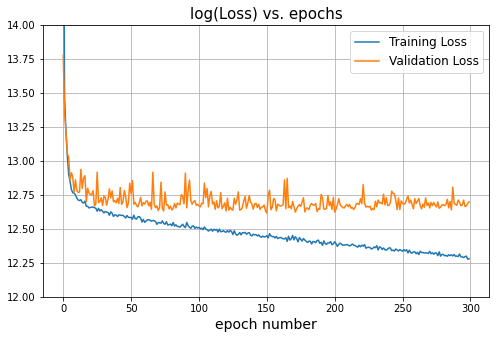

In [66]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(np.log(history.history['loss']), label='Training Loss')
ax.plot(np.log(history.history['val_loss']), label='Validation Loss')
ax.set_title("log(Loss) vs. epochs", fontsize=15)
ax.set_xlabel("epoch number", fontsize=14)
ax.legend(fontsize=12)
ax.set_ylim(12,14)
ax.grid();

### Dropout

In [67]:
from tensorflow.keras.layers import Dropout

In [68]:
nn_reg_dropout = Sequential()
n_hidden = 64
dropout_rate = 0.2

## Dropout for input layer
nn_reg_dropout.add(Dropout(rate=dropout_rate, input_shape=(n_input,)))
                   
## Now adding four hidden layers + dropout for each of them
nn_reg_dropout.add(Dense(units=n_hidden, activation='relu', input_shape=(n_input,)))
nn_reg_dropout.add(Dropout(rate=dropout_rate))
                   
nn_reg_dropout.add(Dense(units=n_hidden, activation='relu'))
nn_reg_dropout.add(Dropout(rate=dropout_rate))

nn_reg_dropout.add(Dense(units=n_hidden, activation='relu'))
nn_reg_dropout.add(Dropout(rate=dropout_rate))

nn_reg_dropout.add(Dense(units=n_hidden, activation='relu'))
nn_reg_dropout.add(Dropout(rate=dropout_rate))

nn_reg_dropout.add(Dense(units=n_hidden, activation='relu'))
nn_reg_dropout.add(Dropout(rate=dropout_rate))

nn_reg_dropout.add(Dense(units=n_hidden, activation='relu'))
nn_reg_dropout.add(Dropout(rate=dropout_rate))

nn_reg_dropout.add(Dense(units=1, activation=None))

In [69]:
nn_reg_dropout.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 21)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)                1408      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)               

In [70]:
# compilation
nn_reg_dropout.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae'])

In [71]:
batch_size = 64
n_epochs = 300
early_stoping = EarlyStopping(monitor='val_mean_absolute_error',
                              min_delta=5,
                              patience=40,
                              verbose=1,
                              mode='auto')

history = nn_reg_dropout.fit(X_train, y_train,
                      epochs=n_epochs,
                      batch_size=batch_size,
                      validation_split=0.1,
                      callbacks=[early_stoping])

Epoch 1/300
683/683 [==============================] - 3s 4ms/step - loss: 12607723.1528 - mse: 12607723.1528 - mae: 2123.0770 - val_loss: 1398520.0000 - val_mse: 1398520.0000 - val_mae: 635.9626
Epoch 2/300
683/683 [==============================] - 3s 4ms/step - loss: 3390143.6287 - mse: 3390143.6287 - mae: 1101.5210 - val_loss: 2013797.0000 - val_mse: 2013797.0000 - val_mae: 770.9499
Epoch 3/300
683/683 [==============================] - 3s 4ms/step - loss: 2960856.1552 - mse: 2960856.1552 - mae: 1002.7929 - val_loss: 1759849.0000 - val_mse: 1759849.0000 - val_mae: 715.1693
Epoch 4/300
683/683 [==============================] - 4s 6ms/step - loss: 2861161.5152 - mse: 2861161.5152 - mae: 978.5809 - val_loss: 1885888.1250 - val_mse: 1885888.1250 - val_mae: 755.8987
Epoch 5/300
683/683 [==============================] - 4s 5ms/step - loss: 2792549.4748 - mse: 2792549.4748 - mae: 963.2335 - val_loss: 2315325.5000 - val_mse: 2315325.5000 - val_mae: 848.0447
Epoch 6/300
683/683 [=========

Epoch 24/300
683/683 [==============================] - 3s 5ms/step - loss: 2558275.9426 - mse: 2558275.9426 - mae: 883.2097 - val_loss: 1782629.0000 - val_mse: 1782629.0000 - val_mae: 792.9767
Epoch 25/300
683/683 [==============================] - 3s 4ms/step - loss: 2537802.8750 - mse: 2537802.8750 - mae: 871.9541 - val_loss: 2053851.0000 - val_mse: 2053851.0000 - val_mae: 842.5262
Epoch 26/300
683/683 [==============================] - 3s 5ms/step - loss: 2466271.2908 - mse: 2466271.2908 - mae: 865.7617 - val_loss: 3282464.2500 - val_mse: 3282464.2500 - val_mae: 1069.7770
Epoch 27/300
683/683 [==============================] - 3s 5ms/step - loss: 2520182.8317 - mse: 2520182.8317 - mae: 882.1975 - val_loss: 1832416.1250 - val_mse: 1832416.1250 - val_mae: 854.7798
Epoch 28/300
683/683 [==============================] - 3s 5ms/step - loss: 2540062.5941 - mse: 2540062.5941 - mae: 883.4115 - val_loss: 2445658.5000 - val_mse: 2445658.5000 - val_mae: 918.1509
Epoch 29/300
683/683 [=======

Epoch 47/300
683/683 [==============================] - 3s 5ms/step - loss: 2392342.3342 - mse: 2392342.3342 - mae: 846.2084 - val_loss: 1701668.8750 - val_mse: 1701668.8750 - val_mae: 816.6760
Epoch 48/300
683/683 [==============================] - 3s 5ms/step - loss: 2266654.9748 - mse: 2266654.9748 - mae: 823.4438 - val_loss: 2119271.5000 - val_mse: 2119271.5000 - val_mae: 891.1743
Epoch 49/300
683/683 [==============================] - 4s 6ms/step - loss: 2241114.8233 - mse: 2241114.8233 - mae: 828.3476 - val_loss: 2810285.2500 - val_mse: 2810285.2500 - val_mae: 1024.5798
Epoch 50/300
683/683 [==============================] - 4s 6ms/step - loss: 2304270.5386 - mse: 2304270.5386 - mae: 831.1174 - val_loss: 2541592.0000 - val_mse: 2541592.0000 - val_mae: 1005.3866
Epoch 51/300
683/683 [==============================] - 3s 5ms/step - loss: 2456643.8204 - mse: 2456643.8204 - mae: 848.4677 - val_loss: 2483188.5000 - val_mse: 2483188.5000 - val_mae: 971.1364
Epoch 52/300
683/683 [======

Epoch 70/300
683/683 [==============================] - 3s 5ms/step - loss: 2241146.2438 - mse: 2241146.2438 - mae: 821.2693 - val_loss: 2534526.5000 - val_mse: 2534526.5000 - val_mae: 983.3090
Epoch 71/300
683/683 [==============================] - 4s 5ms/step - loss: 2225836.6976 - mse: 2225836.6976 - mae: 813.8642 - val_loss: 2120852.0000 - val_mse: 2120852.0000 - val_mae: 922.0388
Epoch 72/300
683/683 [==============================] - 4s 6ms/step - loss: 2216428.8130 - mse: 2216428.8130 - mae: 821.5317 - val_loss: 2283019.7500 - val_mse: 2283019.7500 - val_mae: 948.0585
Epoch 73/300
683/683 [==============================] - 4s 6ms/step - loss: 2201501.2829 - mse: 2201501.2829 - mae: 812.3116 - val_loss: 1764958.7500 - val_mse: 1764958.7500 - val_mae: 867.4617
Epoch 74/300
683/683 [==============================] - 5s 7ms/step - loss: 2224113.9731 - mse: 2224113.9731 - mae: 819.2458 - val_loss: 1972889.6250 - val_mse: 1972889.6250 - val_mae: 900.5006
Epoch 75/300
683/683 [========

Epoch 93/300
683/683 [==============================] - 3s 5ms/step - loss: 2192362.5360 - mse: 2192362.5360 - mae: 818.7982 - val_loss: 2286356.5000 - val_mse: 2286356.5000 - val_mae: 972.8716
Epoch 94/300
683/683 [==============================] - 3s 4ms/step - loss: 2229791.8185 - mse: 2229791.8185 - mae: 814.0583 - val_loss: 2422500.7500 - val_mse: 2422500.7500 - val_mae: 981.8851
Epoch 95/300
683/683 [==============================] - 3s 4ms/step - loss: 2236292.9181 - mse: 2236292.9181 - mae: 824.3426 - val_loss: 2360621.5000 - val_mse: 2360621.5000 - val_mae: 977.1644
Epoch 96/300
683/683 [==============================] - 3s 4ms/step - loss: 2253472.6579 - mse: 2253472.6579 - mae: 817.0028 - val_loss: 2711625.7500 - val_mse: 2711625.7500 - val_mae: 1024.0050
Epoch 97/300
683/683 [==============================] - 3s 4ms/step - loss: 2120026.5693 - mse: 2120026.5693 - mae: 802.7028 - val_loss: 2377426.2500 - val_mse: 2377426.2500 - val_mae: 951.1658
Epoch 98/300
683/683 [=======

Epoch 116/300
683/683 [==============================] - 3s 5ms/step - loss: 2121814.6246 - mse: 2121814.6246 - mae: 801.0970 - val_loss: 1955515.1250 - val_mse: 1955515.1250 - val_mae: 904.8039
Epoch 117/300
683/683 [==============================] - 3s 5ms/step - loss: 2250567.2734 - mse: 2250567.2734 - mae: 821.3919 - val_loss: 1836016.7500 - val_mse: 1836016.7500 - val_mae: 873.3304
Epoch 118/300
683/683 [==============================] - 3s 5ms/step - loss: 2267003.6488 - mse: 2267003.6488 - mae: 819.5844 - val_loss: 2630993.0000 - val_mse: 2630993.0000 - val_mae: 1040.9923
Epoch 119/300
683/683 [==============================] - 3s 4ms/step - loss: 2197420.8534 - mse: 2197420.8534 - mae: 811.9054 - val_loss: 2215674.5000 - val_mse: 2215674.5000 - val_mae: 965.3329
Epoch 120/300
683/683 [==============================] - 3s 4ms/step - loss: 2169296.1195 - mse: 2169296.1195 - mae: 800.5786 - val_loss: 2728940.2500 - val_mse: 2728940.2500 - val_mae: 1069.2445
Epoch 121/300
683/683 [

Epoch 139/300
683/683 [==============================] - 4s 5ms/step - loss: 2082453.9962 - mse: 2082453.9962 - mae: 794.2397 - val_loss: 3151636.2500 - val_mse: 3151636.2500 - val_mae: 1064.6586
Epoch 140/300
683/683 [==============================] - 4s 6ms/step - loss: 2057120.0623 - mse: 2057120.0623 - mae: 789.2631 - val_loss: 2858949.2500 - val_mse: 2858949.2500 - val_mae: 1019.6384
Epoch 141/300
683/683 [==============================] - 4s 5ms/step - loss: 2037008.9041 - mse: 2037008.9041 - mae: 787.8157 - val_loss: 3854742.7500 - val_mse: 3854742.7500 - val_mae: 1168.6547
Epoch 142/300
683/683 [==============================] - 4s 5ms/step - loss: 2166239.7357 - mse: 2166239.7357 - mae: 816.5587 - val_loss: 1829626.2500 - val_mse: 1829626.2500 - val_mae: 889.9682
Epoch 143/300
683/683 [==============================] - 4s 6ms/step - loss: 2057189.2030 - mse: 2057189.2030 - mae: 795.5822 - val_loss: 2044180.7500 - val_mse: 2044180.7500 - val_mae: 893.7388
Epoch 144/300
683/683 

Epoch 162/300
683/683 [==============================] - 4s 6ms/step - loss: 2098271.8655 - mse: 2098271.8655 - mae: 800.0998 - val_loss: 2358947.2500 - val_mse: 2358947.2500 - val_mae: 968.8204
Epoch 163/300
683/683 [==============================] - 4s 6ms/step - loss: 2087099.9675 - mse: 2087099.9675 - mae: 792.8589 - val_loss: 2476583.0000 - val_mse: 2476583.0000 - val_mae: 979.2433
Epoch 164/300
683/683 [==============================] - 4s 5ms/step - loss: 2060955.6120 - mse: 2060955.6120 - mae: 788.0543 - val_loss: 2954725.0000 - val_mse: 2954725.0000 - val_mae: 1000.3990
Epoch 165/300
683/683 [==============================] - 4s 6ms/step - loss: 2083988.8299 - mse: 2083988.8299 - mae: 791.1176 - val_loss: 2294501.2500 - val_mse: 2294501.2500 - val_mae: 914.8052
Epoch 166/300
683/683 [==============================] - 4s 6ms/step - loss: 2003528.2312 - mse: 2003528.2312 - mae: 788.1516 - val_loss: 3142805.0000 - val_mse: 3142805.0000 - val_mae: 1042.9843
Epoch 167/300
683/683 [

Epoch 185/300
683/683 [==============================] - 4s 5ms/step - loss: 2130914.7405 - mse: 2130914.7405 - mae: 797.6582 - val_loss: 2713485.2500 - val_mse: 2713485.2500 - val_mae: 974.9086
Epoch 186/300
683/683 [==============================] - 4s 6ms/step - loss: 2173022.5718 - mse: 2173022.5718 - mae: 802.3420 - val_loss: 2696519.2500 - val_mse: 2696519.2500 - val_mae: 982.4213
Epoch 187/300
683/683 [==============================] - 4s 5ms/step - loss: 2046883.1663 - mse: 2046883.1663 - mae: 782.7410 - val_loss: 2562772.0000 - val_mse: 2562772.0000 - val_mae: 928.8420
Epoch 188/300
683/683 [==============================] - 4s 6ms/step - loss: 2176499.1687 - mse: 2176499.1687 - mae: 795.8229 - val_loss: 2978180.7500 - val_mse: 2978180.7500 - val_mae: 990.3716
Epoch 189/300
683/683 [==============================] - 3s 5ms/step - loss: 1983866.6491 - mse: 1983866.6491 - mae: 774.1713 - val_loss: 2735213.5000 - val_mse: 2735213.5000 - val_mae: 959.3050
Epoch 190/300
683/683 [==

Epoch 208/300
683/683 [==============================] - 3s 5ms/step - loss: 2026747.0519 - mse: 2026747.0519 - mae: 772.8593 - val_loss: 3080861.0000 - val_mse: 3080861.0000 - val_mae: 1016.9347
Epoch 209/300
683/683 [==============================] - 3s 5ms/step - loss: 2040456.2440 - mse: 2040456.2440 - mae: 776.4869 - val_loss: 3176409.0000 - val_mse: 3176409.0000 - val_mae: 1038.7819
Epoch 210/300
683/683 [==============================] - 3s 5ms/step - loss: 2099546.6933 - mse: 2099546.6933 - mae: 795.2692 - val_loss: 2823524.0000 - val_mse: 2823524.0000 - val_mae: 998.7748
Epoch 211/300
683/683 [==============================] - 4s 6ms/step - loss: 2006859.2694 - mse: 2006859.2694 - mae: 778.7735 - val_loss: 3373122.0000 - val_mse: 3373122.0000 - val_mae: 1056.4623
Epoch 212/300
683/683 [==============================] - 4s 5ms/step - loss: 2087233.7658 - mse: 2087233.7658 - mae: 788.7162 - val_loss: 3028953.0000 - val_mse: 3028953.0000 - val_mae: 984.7004
Epoch 213/300
683/683 

Epoch 231/300
683/683 [==============================] - 3s 5ms/step - loss: 1918058.5689 - mse: 1918058.5689 - mae: 758.5377 - val_loss: 2858791.0000 - val_mse: 2858791.0000 - val_mae: 962.1059
Epoch 232/300
683/683 [==============================] - 3s 4ms/step - loss: 2069938.2579 - mse: 2069938.2579 - mae: 779.5960 - val_loss: 3449417.2500 - val_mse: 3449417.2500 - val_mae: 1033.0093
Epoch 233/300
683/683 [==============================] - 3s 4ms/step - loss: 2020736.1946 - mse: 2020736.1946 - mae: 776.6064 - val_loss: 2895309.2500 - val_mse: 2895309.2500 - val_mae: 981.3618
Epoch 234/300
683/683 [==============================] - 3s 4ms/step - loss: 1972665.1389 - mse: 1972665.1389 - mae: 768.9448 - val_loss: 2479899.7500 - val_mse: 2479899.7500 - val_mae: 935.5394
Epoch 235/300
683/683 [==============================] - 3s 5ms/step - loss: 2132923.8393 - mse: 2132923.8393 - mae: 785.1623 - val_loss: 3177917.0000 - val_mse: 3177917.0000 - val_mae: 1012.6613
Epoch 236/300
683/683 [

Epoch 254/300
683/683 [==============================] - 3s 4ms/step - loss: 1827291.3299 - mse: 1827291.3299 - mae: 747.0108 - val_loss: 3048927.5000 - val_mse: 3048927.5000 - val_mae: 989.9203
Epoch 255/300
683/683 [==============================] - 2s 3ms/step - loss: 1900749.7480 - mse: 1900749.7480 - mae: 760.3922 - val_loss: 2356224.5000 - val_mse: 2356224.5000 - val_mae: 908.3765
Epoch 256/300
683/683 [==============================] - 3s 5ms/step - loss: 2080597.6047 - mse: 2080597.6047 - mae: 775.9286 - val_loss: 2750189.5000 - val_mse: 2750189.5000 - val_mae: 935.8127
Epoch 257/300
683/683 [==============================] - 3s 5ms/step - loss: 2015375.9295 - mse: 2015375.9295 - mae: 774.9910 - val_loss: 2851009.5000 - val_mse: 2851009.5000 - val_mae: 948.6365
Epoch 258/300
683/683 [==============================] - 3s 5ms/step - loss: 2111807.6087 - mse: 2111807.6087 - mae: 782.2414 - val_loss: 2835896.0000 - val_mse: 2835896.0000 - val_mae: 944.9772
Epoch 259/300
683/683 [==

Epoch 277/300
683/683 [==============================] - 3s 5ms/step - loss: 1978136.8925 - mse: 1978136.8925 - mae: 758.9887 - val_loss: 2867631.2500 - val_mse: 2867631.2500 - val_mae: 945.2579
Epoch 278/300
683/683 [==============================] - 3s 5ms/step - loss: 1903390.4152 - mse: 1903390.4152 - mae: 756.9184 - val_loss: 3010057.2500 - val_mse: 3010057.2500 - val_mae: 992.5686
Epoch 279/300
683/683 [==============================] - 3s 5ms/step - loss: 1987750.0309 - mse: 1987750.0309 - mae: 766.1537 - val_loss: 2291686.5000 - val_mse: 2291686.5000 - val_mae: 860.2595
Epoch 280/300
683/683 [==============================] - 3s 5ms/step - loss: 1914895.0486 - mse: 1914895.0486 - mae: 760.2269 - val_loss: 2904162.0000 - val_mse: 2904162.0000 - val_mae: 953.3854
Epoch 281/300
683/683 [==============================] - 3s 4ms/step - loss: 1955205.0296 - mse: 1955205.0296 - mae: 756.9862 - val_loss: 2637463.5000 - val_mse: 2637463.5000 - val_mae: 928.5490
Epoch 282/300
683/683 [==

Epoch 300/300
683/683 [==============================] - 4s 6ms/step - loss: 1977639.5133 - mse: 1977639.5133 - mae: 764.0773 - val_loss: 2611589.7500 - val_mse: 2611589.7500 - val_mae: 906.6702


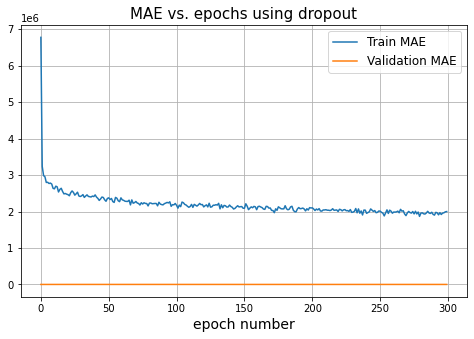

In [73]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(history.history['mse'], label='Train MAE')
ax.plot(history.history['val_mae'], label='Validation MAE')
ax.set_title("MAE vs. epochs using dropout", fontsize=15)
ax.set_xlabel("epoch number", fontsize=14)
ax.legend(fontsize=12)
ax.grid();